In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

plt.style.use('default')

In [28]:
# load data -store1.csv
store1 = pd.read_csv("../store1.csv")

In [29]:
store1.head()

,Unnamed: 0,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [30]:
# get the max and min date for every family
store1.groupby('family').agg({'date':['min','max', 'count']})


date                  
                                   min         max count
family                                                  
AUTOMOTIVE                  2013-01-01  2017-08-15  1684
BABY CARE                   2013-01-01  2017-08-15  1684
BEAUTY                      2013-01-01  2017-08-15  1684
BEVERAGES                   2013-01-01  2017-08-15  1684
BOOKS                       2013-01-01  2017-08-15  1684
BREAD/BAKERY                2013-01-01  2017-08-15  1684
CELEBRATION                 2013-01-01  2017-08-15  1684
CLEANING                    2013-01-01  2017-08-15  1684
DAIRY                       2013-01-01  2017-08-15  1684
DELI                        2013-01-01  2017-08-15  1684
EGGS                        2013-01-01  2017-08-15  1684
FROZEN FOODS                2013-01-01  2017-08-15  1684
GROCERY I                   2013-01-01  2017-08-15  1684
GROCERY II                  2013-01-01  2017-08-15  1684
HARDWARE                    2013-01-01  2017-08-15  1684
HOME AND KITCHEN I          2013-01-01  2017-08-15  1684
HOME AND KITCHEN II         2013-01-01  2017-08-15  1684
HOME APPLIANCES             2013-01-01  2017-08-15  1684
HOME CARE                   2013-01-01  2017-08-15  1684
LADIESWEAR                  2013-01-01  2017-08-15  1684
LAWN AND GARDEN             2013-01-01  2017-08-15  1684
LINGERIE                    2013-01-01  2017-08-15  1684
LIQUOR,WINE,BEER            2013-01-01  2017-08-15  1684
MAGAZINES                   2013-01-01  2017-08-15  1684
MEATS                       2013-01-01  2017-08-15  1684
PERSONAL CARE               2013-01-01  2017-08-15  1684
PET SUPPLIES                2013-01-01  2017-08-15  1684
PLAYERS AND ELECTRONICS     2013-01-01  2017-08-15  1684
POULTRY                     2013-01-01  2017-08-15  1684
PREPARED FOODS              2013-01-01  2017-08-15  1684
PRODUCE                     2013-01-01  2017-08-15  1684
SCHOOL AND OFFICE SUPPLIES  2013-01-01  2017-08-15  1684
SEAFOOD                     2013-01-01  2017-08-15  1684

In [31]:
from datetime import date

start = date(2013, 1, 1)
end = date(2017, 8, 15)
delta = end - start
print(delta.days)

1687


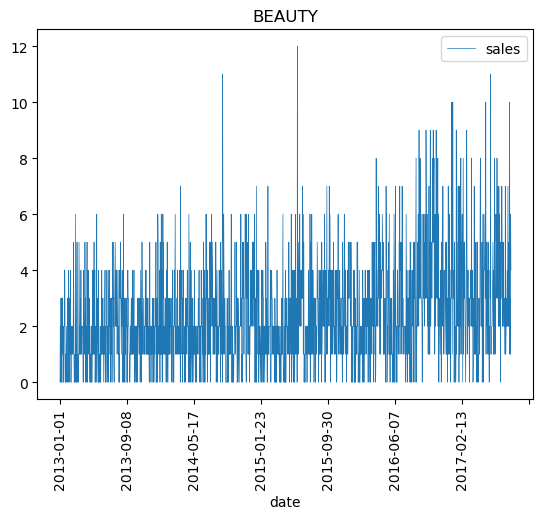

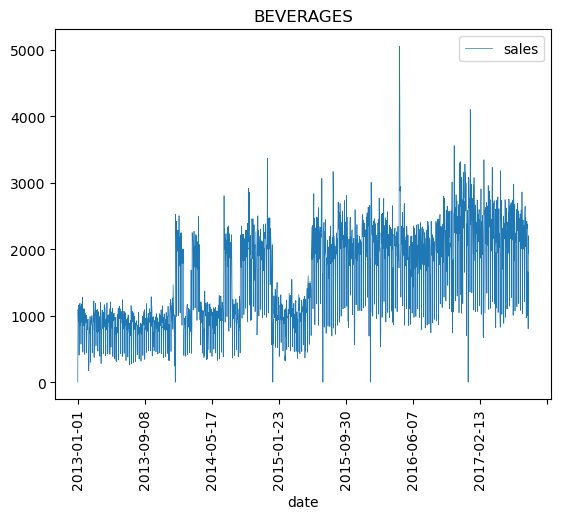

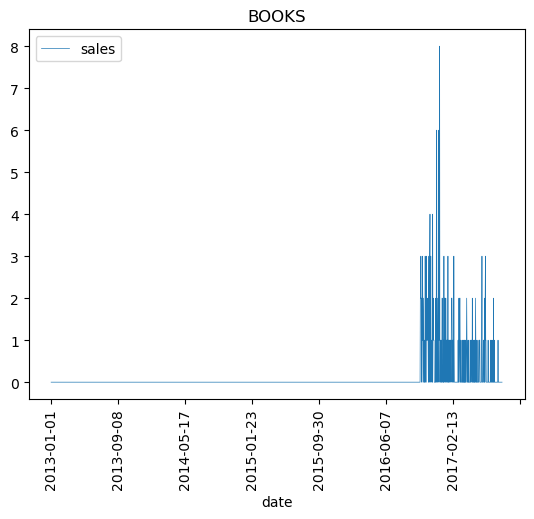

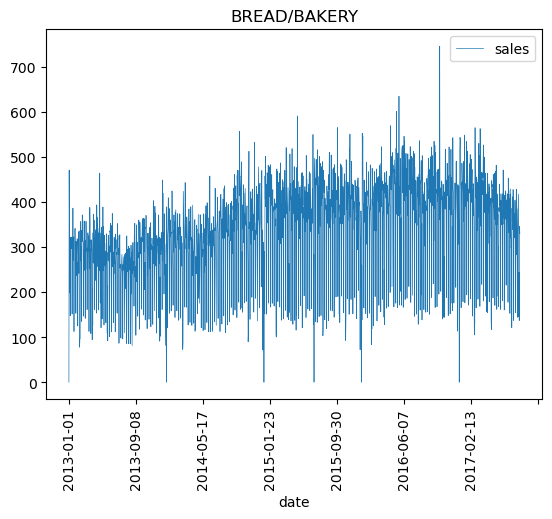

In [32]:
#plot whole sales for every family - do it in loop
for family in store1['family'].unique()[2:6]:
    store1[store1['family']==family].plot(x='date',y='sales',title=family,linewidth=0.5)
    plt.xticks(rotation=90)
    plt.show()

In [33]:
# check the weekday pf 2017-08-15
print(pd.to_datetime('2017-08-15').weekday())
print(pd.to_datetime('2017-08-15').strftime('%A'))
print(pd.to_datetime('2017-08-7').strftime('%A'))


1
Tuesday
Monday


In [45]:
# train test split - test from ('2017-08-07') (last whole week)
split_date = '2017-08-07'
train = store1.loc[store1['date'] < split_date].copy()
# test date from 2017-08-07 to 2017-08-14
test = store1.loc[(store1['date'] >= split_date) & (store1['date'] < "2017-08-14")].copy()

train['date'] = pd.to_datetime(train['date']).dt.date  # Convert 'date' column to datetime format
test['date'] = pd.to_datetime(test['date']).dt.date  # Convert 'date' column to datetime format

print("Pierwsza data zbioru treningowego: ", train['date'].min(), train['date'].min().strftime('%A'))
print("Ostatnia data zbioru treningowego: ",train['date'].max(), train['date'].max().strftime('%A'))
print("Pierwsza data zbioru testowego: ", test['date'].min(), test['date'].min().strftime('%A'))
print("Ostatnia data zbioru treningowego: ", test['date'].max(), test['date'].max().strftime('%A'))


Pierwsza data zbioru treningowego:  2013-01-01 Tuesday
Ostatnia data zbioru treningowego:  2017-08-06 Sunday
Pierwsza data zbioru testowego:  2017-08-07 Monday
Ostatnia data zbioru treningowego:  2017-08-13 Sunday


MODELE LOKALNE

In [ ]:
# wygeneruj prognozy i błedy dla każdej rodziny przy pomocy naive forecast, średniej, ARIMA i ETS
